# Aula 1 - Análise de Dados com Pandas
Ensinar a carregar arquivos CSV no Google Colab, realizar leitura e visualização inicial de dados com Pandas. O aluno começará a manipular bases reais de dados com comandos simples de análise

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [165]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [167]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [168]:
linhas, colunas = df.shape
print(f"O número de linhas é: {linhas} e colunas é: {colunas}")

O número de linhas é: 133349 e colunas é: 11


In [169]:
print(f"As colunas são: {df.columns}")

As colunas são: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [170]:
renomear_colunas ={
    "work_year": "ano",
    "experience_level": "senioridade",
    "employment_type": "contrato",
    "job_title": "cargo",
    "salary": "salario",
    "salary_currency": "moeda",
    "salary_in_usd": "usd",
    "employee_residence": "residencia",
    "remote_ratio": "remoto",
    "company_location": "empresa",
    "company_size": "tamanho_empresa"
}

df.rename(columns= renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [171]:
#Calcula a frequência de cada categoria nas coluna 
print(df["senioridade"].value_counts())
print(df["contrato"].value_counts())
print(df["remoto"].value_counts())
print(df["tamanho_empresa"].value_counts())

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64
contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64
remoto
0      105312
100     27718
50        319
Name: count, dtype: int64
tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64


In [172]:
traducao_senioridade = {
    "EN": "Junior",
    "MI": "Pleno",
    "SE": "Sênior",
    "EX": "Executivo"
}

df["senioridade"] = df["senioridade"].replace(traducao_senioridade)
df["senioridade"].value_counts()

senioridade
Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [173]:
traducao_contrato = {
    "FT": "Tempo Integral",
    "PT": "Meio Período",
    "CT": "Contrato",
    "FL": "Freelancer"
}

df["contrato"] = df["contrato"].replace(traducao_contrato)
df["contrato"].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

In [174]:
traducao_tamanho_empresa = {
    "S": "Pequena",
    "M": "Média",
    "L": "Grande"
}

df["tamanho_empresa"] = df["tamanho_empresa"].replace(traducao_tamanho_empresa)
df["tamanho_empresa"].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [175]:
traducao_remoto = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}

df["remoto"] = df["remoto"].replace(traducao_remoto)
df["remoto"].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [176]:
df.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [177]:
df.describe(include=object)

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2 - Preparação e limpeza dos Dados
Capacitar o aluno renomear colunas, identificar e tratar dados faltantes, .

In [178]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [179]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [180]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [181]:
df[df.isnull().any(axis=1)]


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [182]:
import numpy as np

#Criação de um DataFrame de teste
df_salarios = pd.DataFrame({
    "nome" : ["Gabriel", "Bruno", "Clarice", "Daniele", "Val"],
    "salarios": [5000, np.nan, 10000, np.nan, 12000]
})

# Calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios["salario_media"] = df_salarios["salarios"].fillna(df_salarios["salarios"].mean().round(2))

df_salarios["salario_mediana"] = df_salarios["salarios"].fillna(df_salarios["salarios"].median())


df_salarios



,nome,salarios,salario_media,salario_mediana
0,Gabriel,5000.0,5000.0,5000.0
1,Bruno,NaN,9000.0,10000.0
2,Clarice,10000.0,10000.0,10000.0
3,Daniele,NaN,9000.0,10000.0
4,Val,12000.0,12000.0,12000.0


In [183]:
df_temperaturas = pd.DataFrame({
    "dia" : ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "temperatura" : [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill()
df_temperaturas["preenchido_bfill"] = df_temperaturas["temperatura"].bfill()

df_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [184]:
df_cidades = pd.DataFrame({
    "nome" : ["Gabriel", "Bruno", "Clarice", "Daniele", "Val"],
    "cidade" : ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não Informado")

df_cidades

,nome,cidade,cidade_preenchida
0,Gabriel,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Clarice,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [185]:
df_limpo = df.dropna()

df_limpo.isnull().sum() 
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


# Aula 3 - Visualização de Dados
Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [186]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Gráfico das Senioridade'}, xlabel='senioridade'>

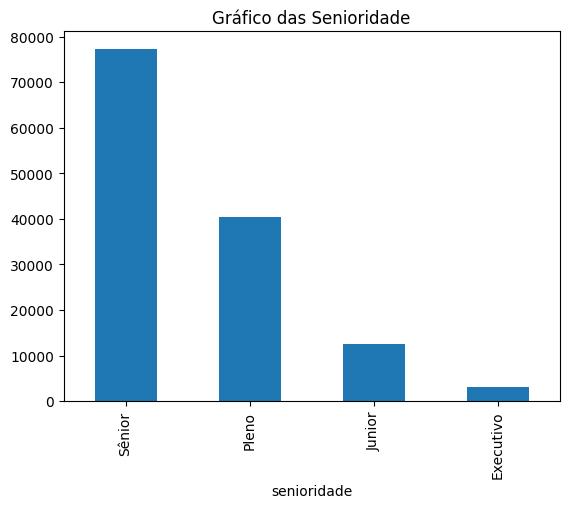

In [187]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Gráfico das Senioridade")

<Axes: xlabel='senioridade', ylabel='usd'>

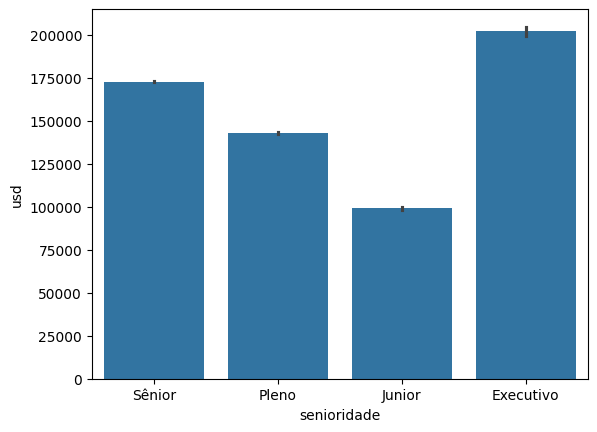

In [188]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

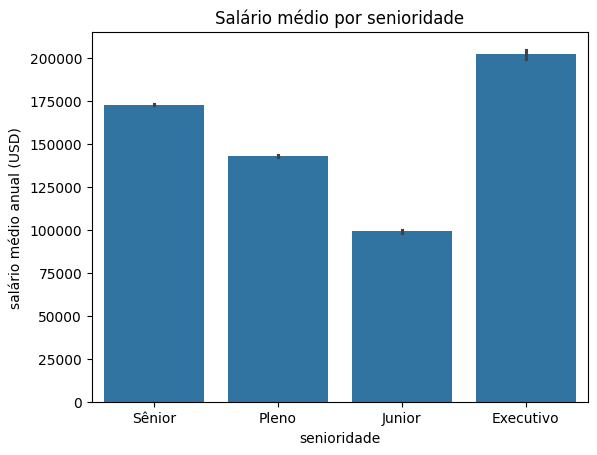

In [189]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por senioridade")
plt.xlabel("senioridade")
plt.ylabel("salário médio anual (USD)")
plt.show()

In [190]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

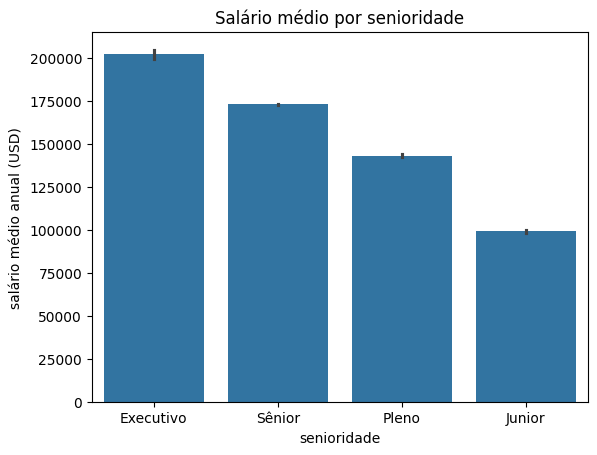

In [191]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).index
plt.Figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("senioridade")
plt.ylabel("salário médio anual (USD)")
plt.show()

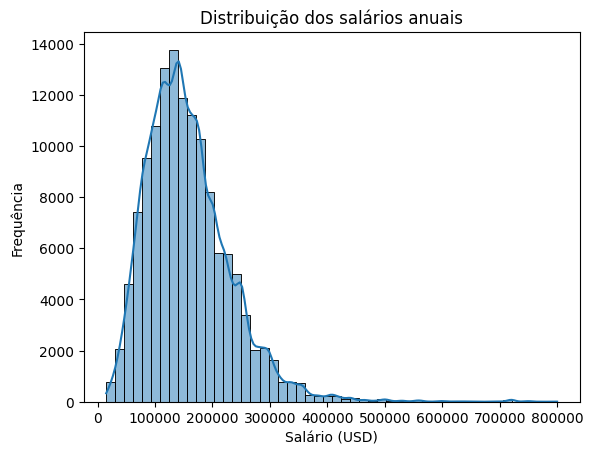

In [192]:
plt.Figure(figsize=(8,4))
sns.histplot(df_limpo["usd"], bins=50, kde= True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()


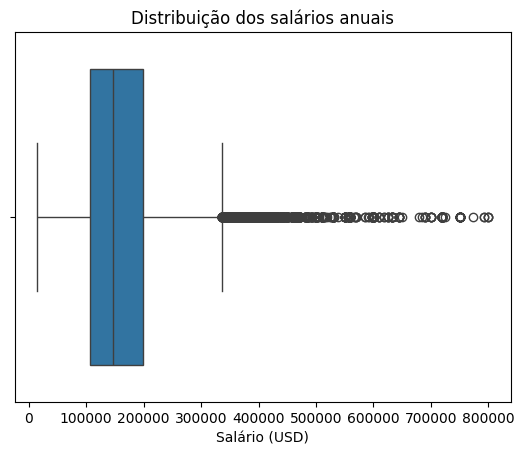

In [193]:
plt.Figure(figsize=(8,4))
sns.boxplot(x=df_limpo["usd"])
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário (USD)")
plt.show()

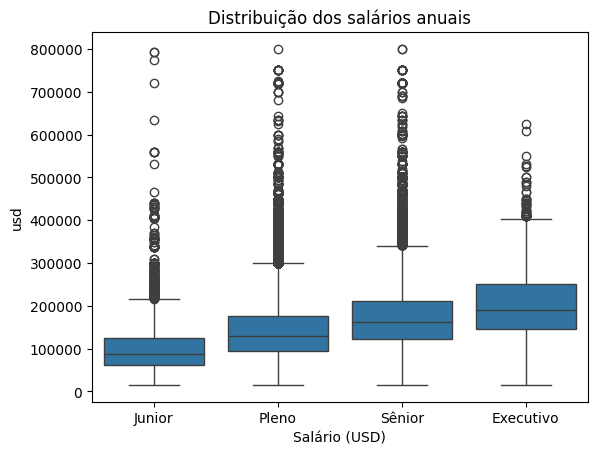

In [ ]:
ordem_senioridade = ["Junior", "Pleno", "Sênior", "Executivo"]
plt.Figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário (USD)")
plt.show()


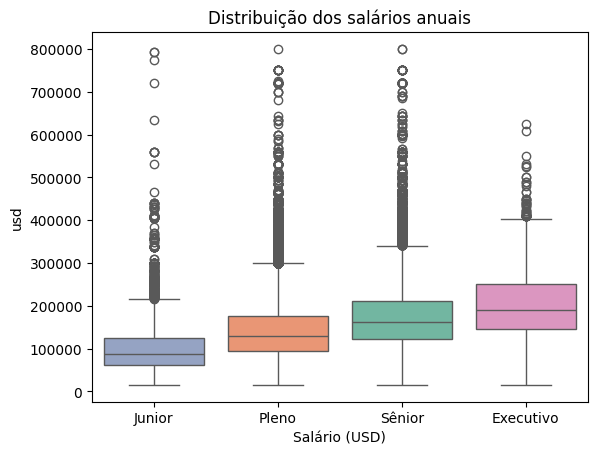

In [201]:
ordem_senioridade = ["Junior", "Pleno", "Sênior", "Executivo"]
plt.Figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue= "senioridade")
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário (USD)")
plt.show()

In [202]:
import plotly.express as px
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()



In [213]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de salário',
             hole=0.5
)

fig.update_traces(textinfo="percent+label")
fig.show()


In [ ]:
import plotly.express as px
senioridade_media_salario = df_limpo.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='residencia',
             y='usd',
             title='Média Salarial por país',
             labels={'residencia': 'País', 'usd': 'Média Salarial Anual (USD)'})

fig.show()